<a href="https://colab.research.google.com/github/zyazam/Machine_Learning_Project/blob/main/Version(1)_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Welcome To The Machine Learning (1) Project***

***What we are trying to do in this project is to apply everything we learned in the machine learning course, from analyzing, cleaning, and processing data to applying machine learning algorithms.***

## And of course, we will use this dataset [**Dataset**](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis) to practice sorcery on it.


## ***We will do our best to carry out all the required tasks..***

## **The students in charge of this project:**
- ***Hamza Mu'in Rashid Issa***
- ***Zaid Yusef GH. Hashash***



---






---




- In the first cell, we will import the libraries used in the project.

In [ ]:
import pandas as pd
import numpy as np
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

- Download data directly from Kaggle, via **API Token**

  -**(google.colab files)**
  This is the library used to upload API tokens

In [ ]:
# upload API Token

from google.colab import files
files.upload()

# Create a new folder (directory) named .kaggle in the user's home folder (~)
!mkdir -p ~/.kaggle
# Copy the access key file to the folder we created in step one
!cp kaggle.json ~/.kaggle/
# Change the access permissions for the copied file to make it secure and private
!chmod 600 ~/.kaggle/kaggle.json

# Retrieve dataset from Kaggle command
!kaggle datasets download -d psparks/instacart-market-basket-analysis

# Unzip files command
!unzip -q instacart-market-basket-analysis.zip -d instacart_data

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis
License(s): CC0-1.0
 70% 139M/197M [00:00<00:00, 1.45GB/s]
100% 197M/197M [00:00<00:00, 1.07GB/s]


In [ ]:
# listdir() >> Available files
data = 'instacart_data/'

print("Available files:")
print(os.listdir(data))

Available files:
['aisles.csv', 'order_products__train.csv', 'orders.csv', 'products.csv', 'departments.csv', 'order_products__prior.csv']


In [ ]:
aisles = pd.read_csv(data + 'aisles.csv')
orders = pd.read_csv(data + 'orders.csv')
departments = pd.read_csv(data + 'departments.csv')
products = pd.read_csv(data + 'products.csv')
order_products_prior = pd.read_csv(data + 'order_products__prior.csv')

In [ ]:
print(aisles.info())
print("------------------------------------------------")
print(orders.info())
print("------------------------------------------------")
print(departments.info())
print("------------------------------------------------")
print(products.info())
print("------------------------------------------------")
print(order_products_prior.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data co

In [ ]:
print(aisles.describe())
print("------------------------------------------------")
print(orders.describe())
print("------------------------------------------------")
print(departments.describe())
print("------------------------------------------------")
print(products.describe())
print("------------------------------------------------")
print(order_products_prior.describe())

         aisle_id
count  134.000000
mean    67.500000
std     38.826537
min      1.000000
25%     34.250000
50%     67.500000
75%    100.750000
max    134.000000
------------------------------------------------
           order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+05  2.300000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       3.421083e+06            3.214874e+06  
mean        1.345202e+01            1.111484e+01  
std         4.226088e+00            9.206737e+00  

In [ ]:
Types = {
    'aisle_id': 'int32',
    'aisle': 'category',
    'order_id': 'int32',
    'user_id': 'int32',
    'eval_set': 'category',
    'order_number': 'int32',
    'order_dow': 'int32',
    'order_hour_of_day': 'int32',
    'days_since_prior_order': 'float16',
    'department_id': 'int8',
    'department': 'category',
    'product_id': 'int32',
    'product_name': 'category',
    'add_to_cart_order': 'int32',
    'reordered': 'int8',
}


# Reading files using enhanced data types
aisles = pd.read_csv(data + 'aisles.csv', dtype={i: Types.get(i, None) for i in ['aisle_id','aisle']})

departments = pd.read_csv(data + 'departments.csv', dtype={i: Types.get(i, None) for i in ['department_id','department']})

products = pd.read_csv(data + 'products.csv', dtype={i: Types.get(i, None) for i in ['product_id', 'aisle_id', 'department_id',' product_name']})

# Read orders, excluding 'days_since_prior_order' from explicit dtype setting during read_csv
orders = pd.read_csv(data + 'orders.csv', dtype={i: Types.get(i, None) for i in ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day','eval_set']})
# Convert 'days_since_prior_order' to float16 after loading the DataFrame
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype('float16')

order_products_prior = pd.read_csv(data + 'order_products__prior.csv', dtype={i: Types.get(i, None) for i in ['order_id', 'product_id', 'add_to_cart_order', 'reordered']})


In [ ]:
print(aisles.info())
print("------------------------------------------------")
print(orders.info())
print("------------------------------------------------")
print(departments.info())
print("------------------------------------------------")
print(products.info())
print("------------------------------------------------")
print(order_products_prior.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   aisle_id  134 non-null    int32   
 1   aisle     134 non-null    category
dtypes: category(1), int32(1)
memory usage: 6.0 KB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                category
 3   order_number            int32   
 4   order_dow               int32   
 5   order_hour_of_day       int32   
 6   days_since_prior_order  float16 
dtypes: category(1), float16(1), int32(5)
memory usage: 75.0 MB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entrie

In [ ]:
My_Data = pd.merge(orders, order_products_prior,how = 'left', on='order_id')
My_Data = pd.merge(My_Data, products,how = 'left', on='product_id')
My_Data = pd.merge(My_Data, aisles,how = 'left', on='aisle_id')
My_Data = pd.merge(My_Data, departments,how = 'left', on='department_id')
My_Data.head()

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,paper goods,household


In [ ]:
My_Data['product_name'] = My_Data['product_name'].astype('category')

In [ ]:
print(My_Data.shape)
print("-----------------------------")
print(My_Data.info())

(32640698, 15)
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32640698 entries, 0 to 32640697
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                category
 3   order_number            int32   
 4   order_dow               int32   
 5   order_hour_of_day       int32   
 6   days_since_prior_order  float16 
 7   product_id              float64 
 8   add_to_cart_order       float64 
 9   reordered               float64 
 10  product_name            category
 11  aisle_id                float64 
 12  department_id           float64 
 13  aisle                   category
 14  department              category
dtypes: category(4), float16(1), float64(5), int32(5)
memory usage: 2.1 GB
None


# **• Missing value analysis and visualization**

In [ ]:
missing_data = My_Data.isnull().sum()
print(missing_data)

print("-------------------------------")
missing_percentage = (My_Data.isnull().sum() / len(My_Data)) * 100
print(missing_percentage)

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                 206209
add_to_cart_order          206209
reordered                  206209
product_name               206209
aisle_id                   206209
department_id              206209
aisle                      206209
department                 206209
dtype: int64
-------------------------------
order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.366494
product_id                0.631754
add_to_cart_order         0.631754
reordered                 0.631754
product_name              0.631754
aisle_id                  0.631754
department_id            

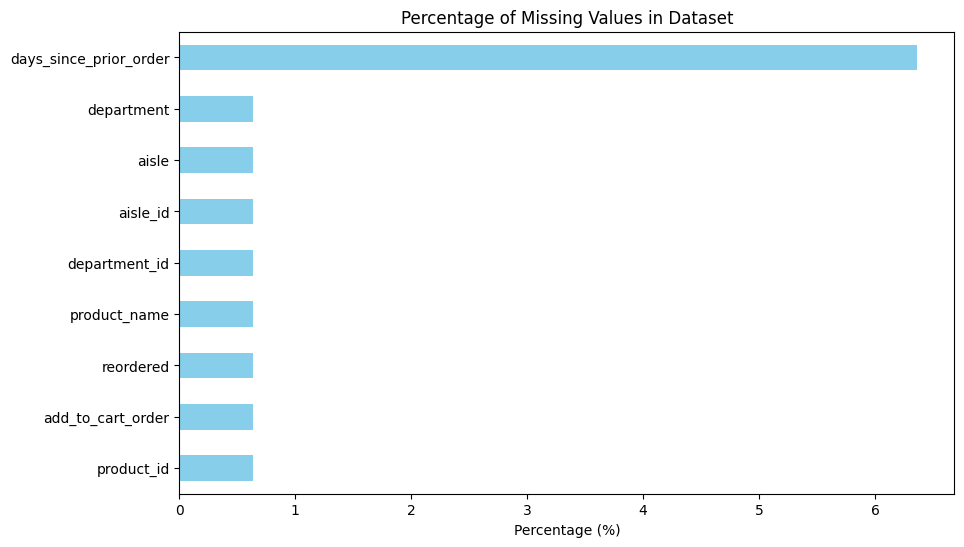

In [ ]:
missing_percentage = missing_percentage[missing_percentage > 0]

if not missing_percentage.empty:
    missing_percentage.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
    plt.title('Percentage of Missing Values in Dataset')
    plt.xlabel('Percentage (%)')
    plt.show()
else:
  print("There are not missing values")

## **We will process missing values ​​directly to reduce memory usage.**

-  ***Since these are missing values ​​due to the lack of matching records in other tables, we will use a fixed-value compensation method.***

In [ ]:
# Text column processing
for col in ['product_name', 'aisle', 'department']:
    if My_Data[col].dtype.name == 'category' and 'Unknown' not in My_Data[col].cat.categories:
        My_Data[col] = My_Data[col].cat.add_categories(['Unknown'])
    My_Data[col] = My_Data[col].fillna('Unknown')

# Processing numerical columns
for col in ['product_id', 'aisle_id', 'department_id', 'add_to_cart_order', 'reordered']:
    My_Data[col] = My_Data[col].fillna(-1).astype('int32')

-  Now, let's address the missing values ​​from the column (days_since_prior_order)

In [ ]:
My_Data['days_since_prior_order'] = My_Data['days_since_prior_order'].fillna(-1)

In [ ]:
missing_data = My_Data.isnull().sum()
print(missing_data)

print("-------------------------------")
missing_percentage = (My_Data.isnull().sum() / len(My_Data)) * 100
print(missing_percentage)

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
dtype: int64
-------------------------------
order_id                  0.0
user_id                   0.0
eval_set                  0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
product_id                0.0
add_to_cart_order         0.0
reordered                 0.0
product_name              0.0
aisle_id                  0.0
department_id             0.0
aisle                     0.0
department                0.0
dtype: float64




---


# **• Distribution plots for numeric features and target(s) (histogram, density).**

### ***-  These six columns were chosen because they encompass the three fundamental dimensions of any recommendation system: time (hour and day of order), behavior (number of orders and basket order), and periodicity (days since the last order). These columns are the most correlated with the target variable (reordered).***

-   **Determine peak activity**

     The diagram shows that activity starts to rise from 7 am and reaches its peak between 10 am and 4 pm.

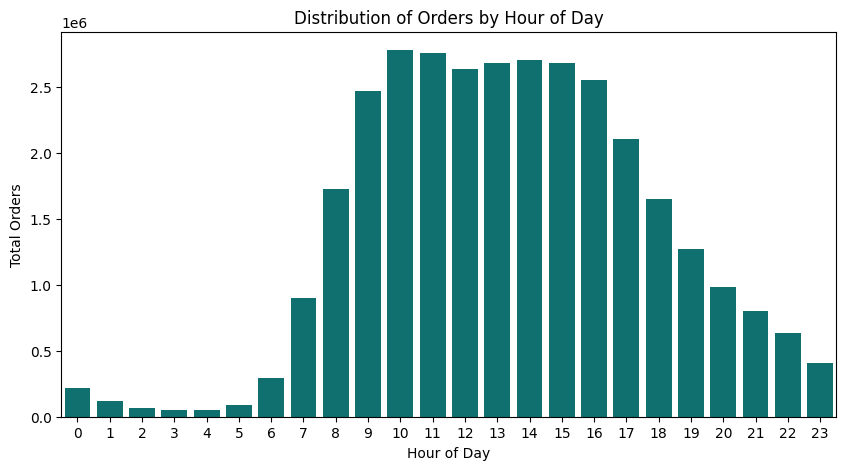

In [ ]:
hourly_dist = My_Data['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_dist.index, y=hourly_dist.values, color='teal')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')
plt.show()

-  **Distribution of days of the week**

    The distribution of orders across the days of the week (from 0 to 6) shows that Saturday and Sunday are the most active days.

/tmp/ipython-input-1164475255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_dist.index, y=dow_dist.values, palette='viridis')


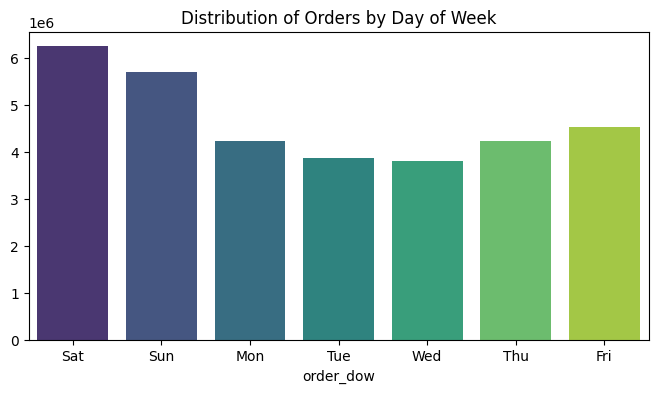

In [ ]:
dow_dist = My_Data['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=dow_dist.index, y=dow_dist.values, palette='viridis')
plt.title('Distribution of Orders by Day of Week')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Sat','Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.show()

-  Distribution of days since the last request

    This graph (Density Plot) shows when customers will return to buy again. We notice two clear peaks; one at 7 days and another very sharp one at 30 days.

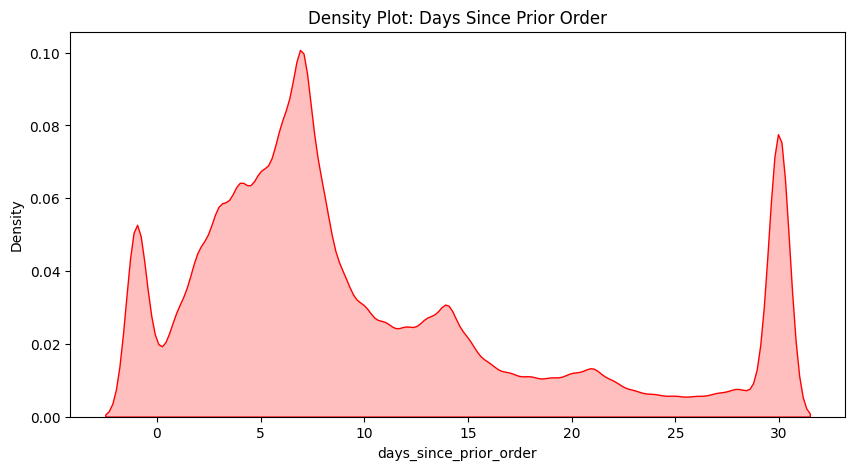

In [ ]:
sample_data = My_Data['days_since_prior_order'].dropna().sample(2000000)

plt.figure(figsize=(10, 5))
sns.kdeplot(sample_data, fill=True, color="r")
plt.title('Density Plot: Days Since Prior Order')
plt.show()

-  **Order of adding products to the cart**

    The probability of a product being the first, second, or tenth item in the shopping cart is shown; the vast majority of products are added to the first five positions (1 to 5), and the higher the position, the fewer the number.

    - Because the dataset exceeds 32 million records, plotting the Key Density Curve (KDE) requires immense processing power. I used a random sample of 2 million records to ensure accurate representation of the statistical distribution while maintaining performance efficiency and processing speed.

    - The value (-1) was used as the Sentinel Value to represent initial requests that contained missing values. Having this value appear separately in the Distribution Plot ensures that new user data is not mixed with that of repeat users, and prevents the model from being biased towards average values ​​such as 7 or 8 days.

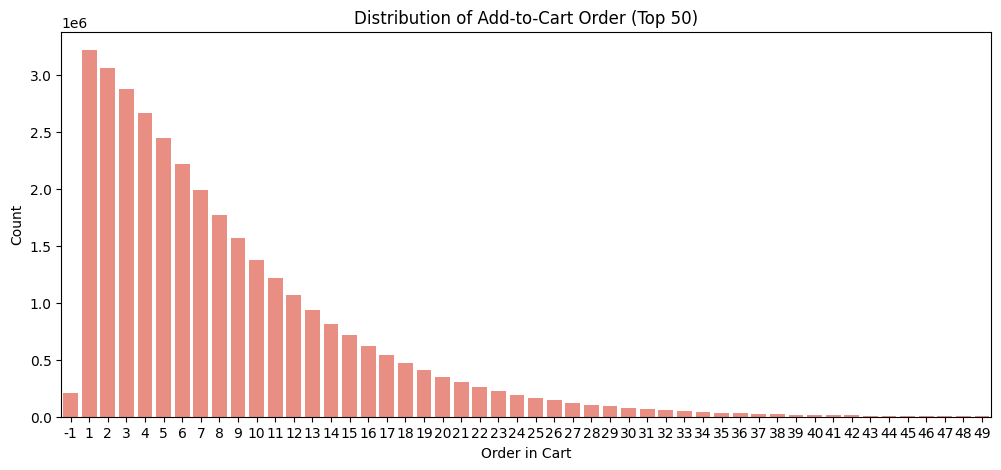

In [ ]:
cart_dist = My_Data['add_to_cart_order'].value_counts().head(50)

plt.figure(figsize=(12, 5))
sns.barplot(x=cart_dist.index, y=cart_dist.values, color='salmon')
plt.title('Distribution of Add-to-Cart Order (Top 50)')
plt.xlabel('Order in Cart')
plt.ylabel('Count')
plt.show()

-  **Customer loyalty**

    The distribution of the number of requests per user is shown. The distribution is right-skewed, as most users have a small number of requests, while the number gradually decreases for "loyal" users who have requested more than 50 times.

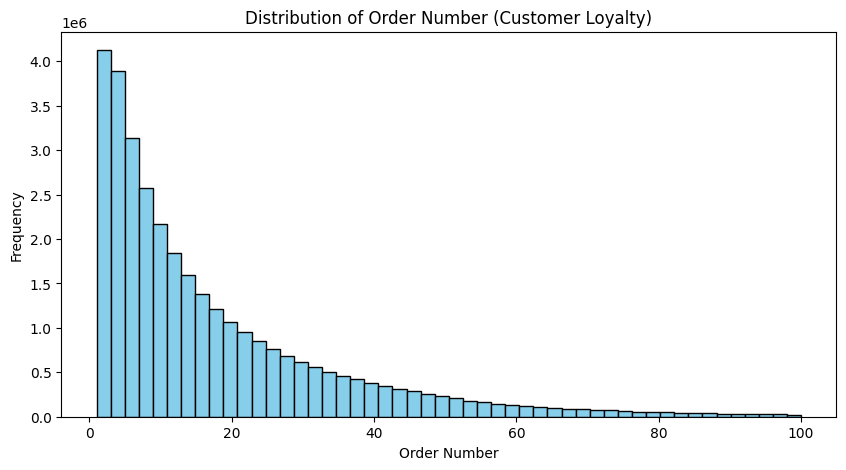

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(My_Data['order_number'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Number (Customer Loyalty)')
plt.xlabel('Order Number')
plt.ylabel('Frequency')
plt.show()

-  **Target variable**

    The graph shows the ratio of products that are repurchased versus those that are purchased for the first time.

NameError: name 'reorder_dist' is not defined

<Figure size 600x400 with 0 Axes>

# **• Categorical cardinality analysis (barplots / top-k frequencies)**

-  We focused on analyzing aisles and sections because they represent structural levels of data. Analyzing them allows us to understand the distribution of purchasing power and identify the categories that dominate transaction volume, which helps simplify the model's feature engineering and ensures its ability to differentiate between fast-moving consumer goods and seasonal goods.

-  **Focus on the most impactful corridors**

    Analysis of all aisles reveals that the Fresh Fruits aisle leads the list with exceptional purchasing volume. This indicates that repurchase decisions in this project are directly influenced by perishable goods, justifying the focus on short-term (7-day) order fulfillment patterns.

/tmp/ipython-input-2957157686.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


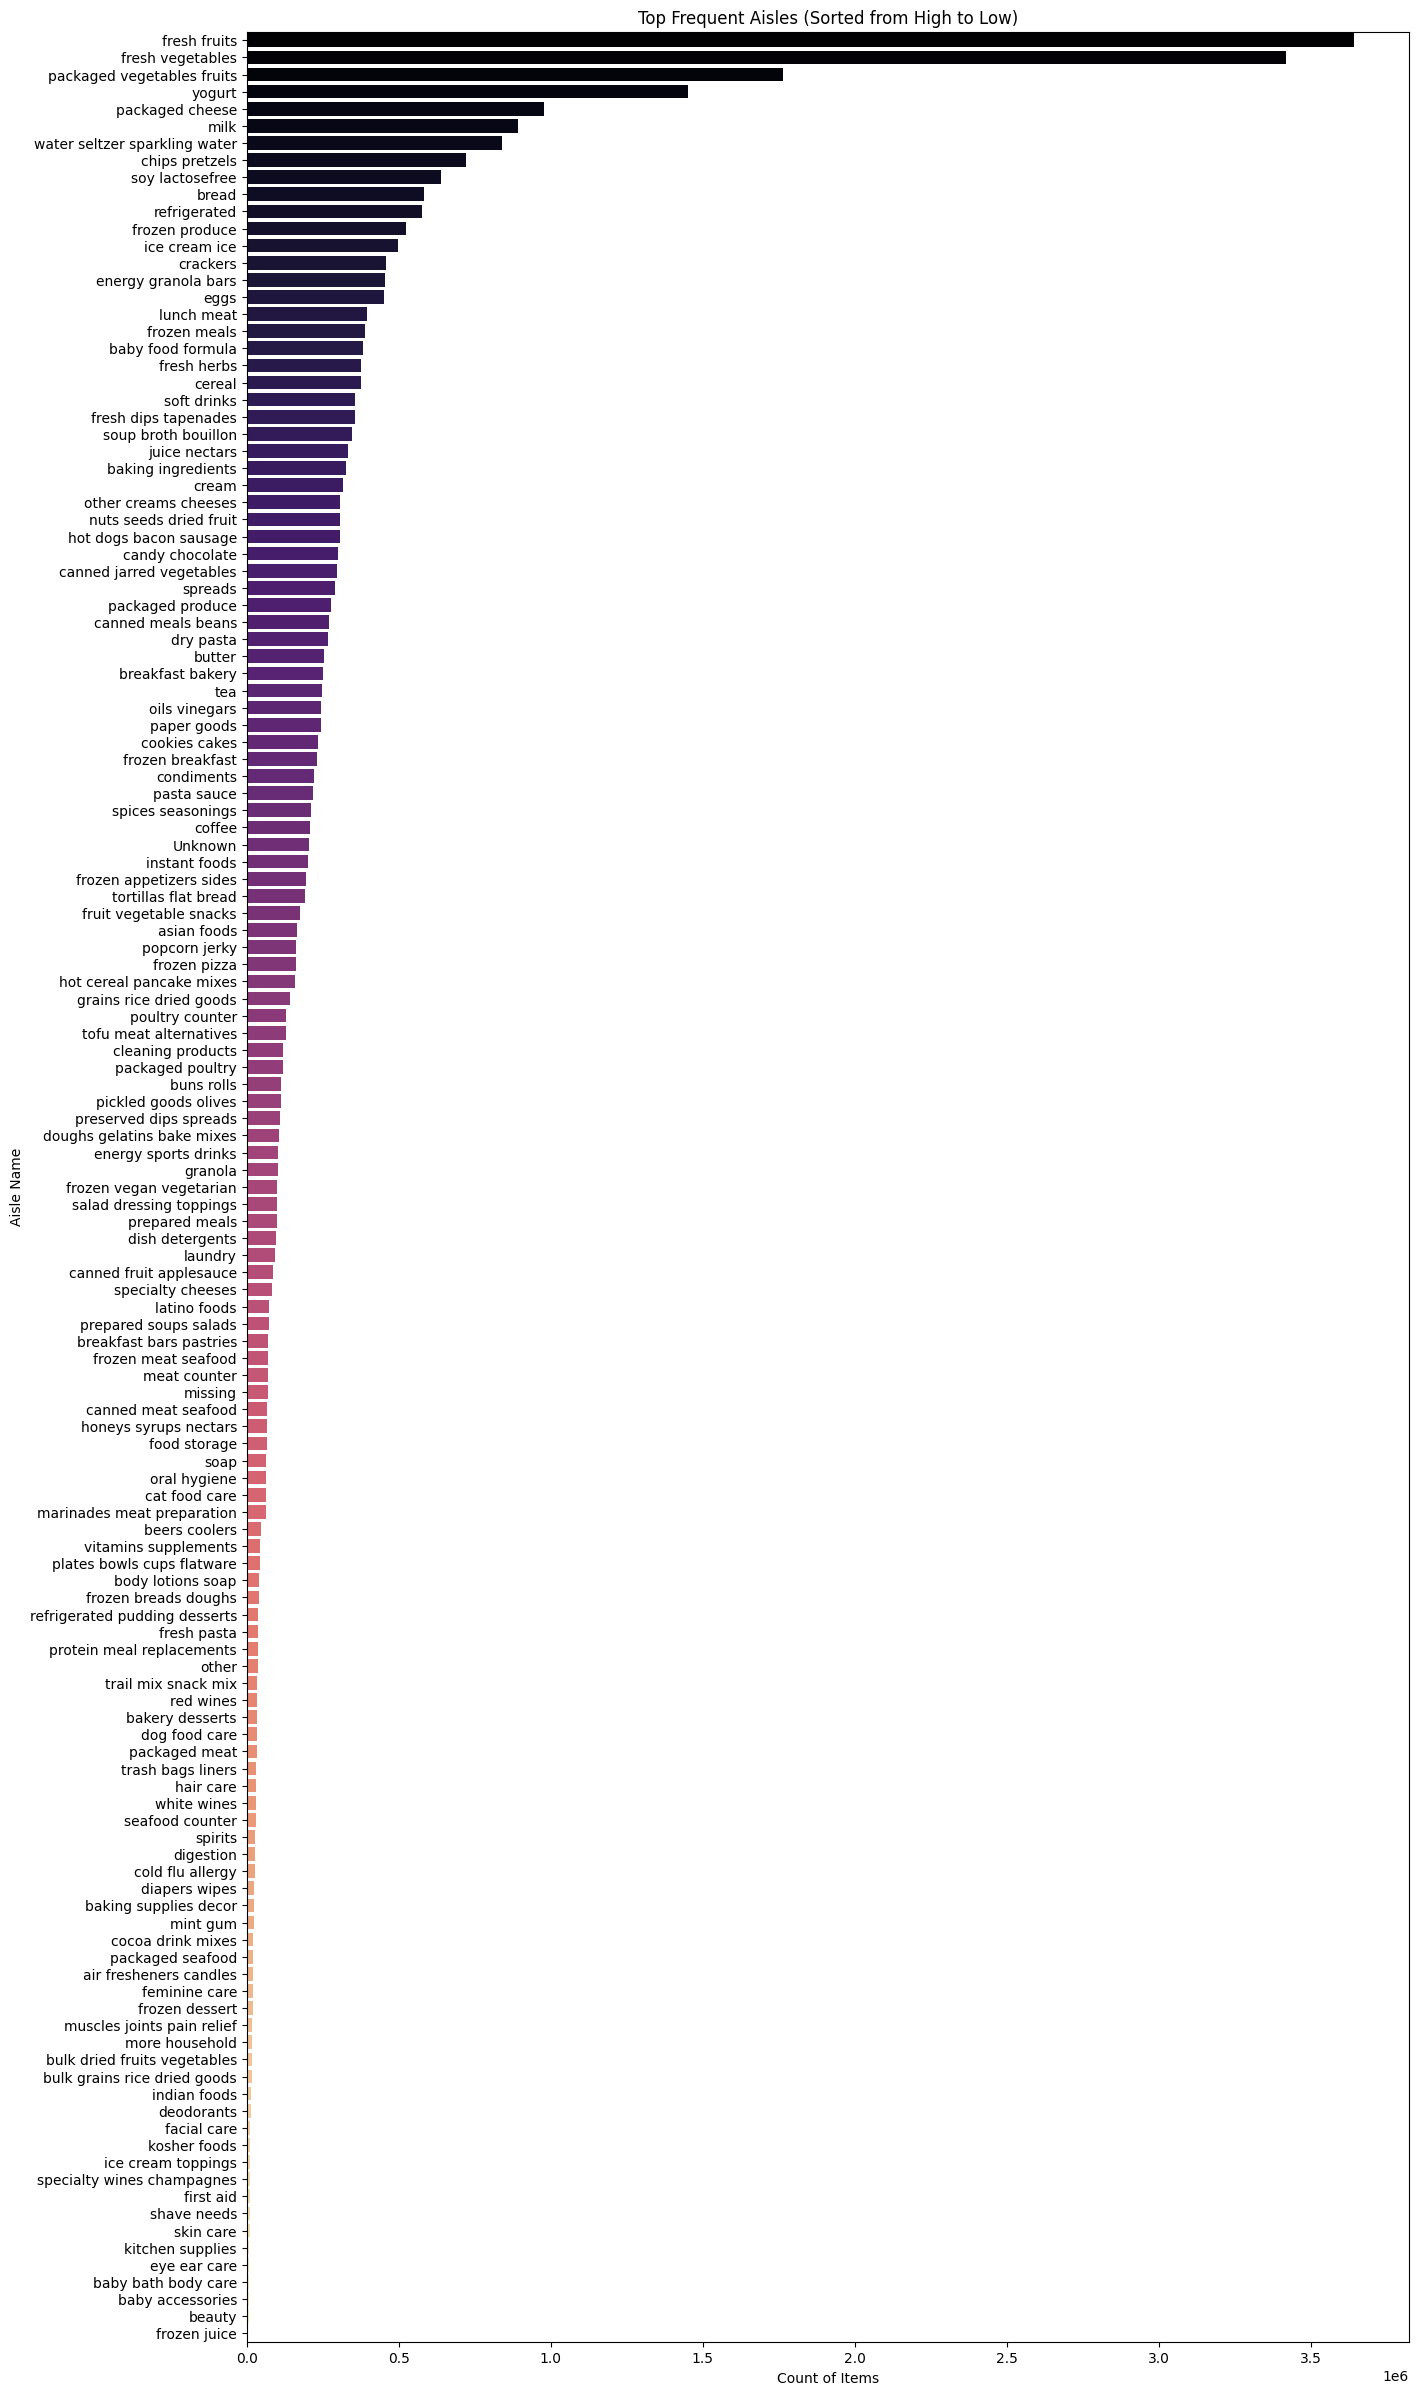

In [ ]:
top_aisles = My_Data['aisle'].value_counts()

plt.figure(figsize=(15, 30))

sns.barplot(
    x=top_aisles.values,
    y=top_aisles.index,
    order=top_aisles.index,
    palette='magma'
)

plt.title('Top Frequent Aisles (Sorted from High to Low)')
plt.xlabel('Count of Items')
plt.ylabel('Aisle Name')
plt.show()

- We moved from detailed aisle analysis to departmental analysis to gain a comprehensive strategic perspective. The results showed that the Produce department represented the largest weight in the data, reinforcing our hypothesis that repurchase behavior is closely linked to fresh, everyday produce.

/tmp/ipython-input-1273000993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


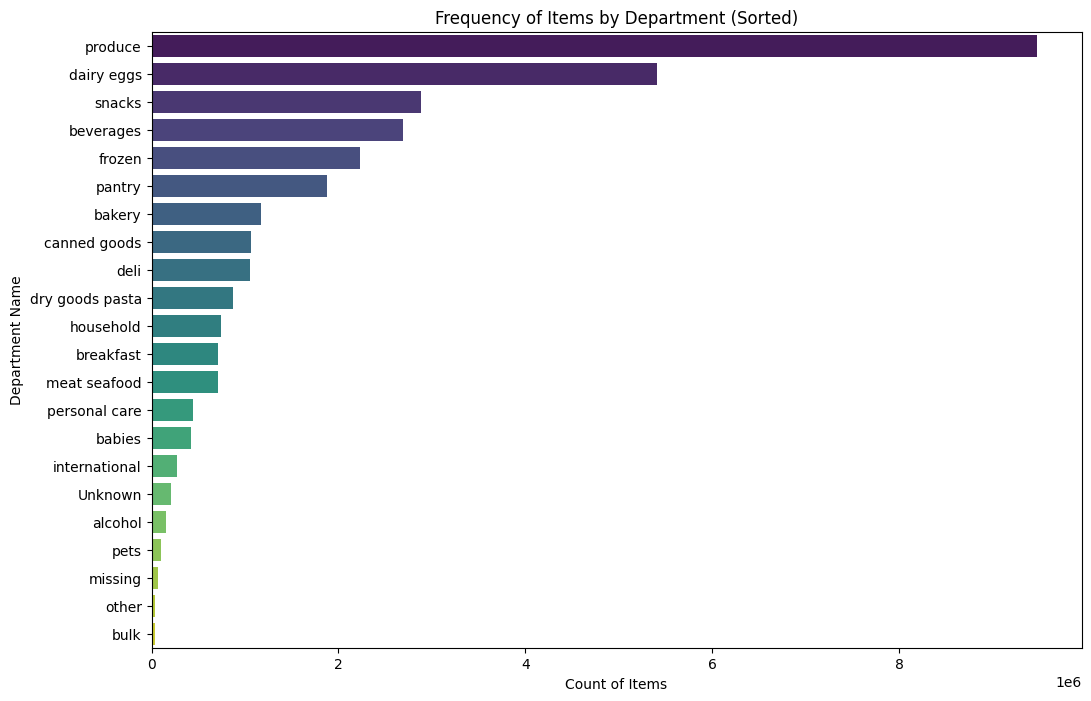

In [ ]:
dept_counts = My_Data['department'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(
    x=dept_counts.values,
    y=dept_counts.index,
    order=dept_counts.index,
    palette='viridis'
)

plt.title('Frequency of Items by Department (Sorted)')
plt.xlabel('Count of Items')
plt.ylabel('Department Name')
plt.show()

-  I performed a **categorical cardinality** analysis using a logarithmic scale to understand the diversity of the textual data. This analysis is essential for selecting the appropriate encoding strategy for each variable; it showed that the products column has high cardinality and requires special processing, while sections and corridors represent a balanced classification level from which the model can learn effectively without excessive memory consumption.

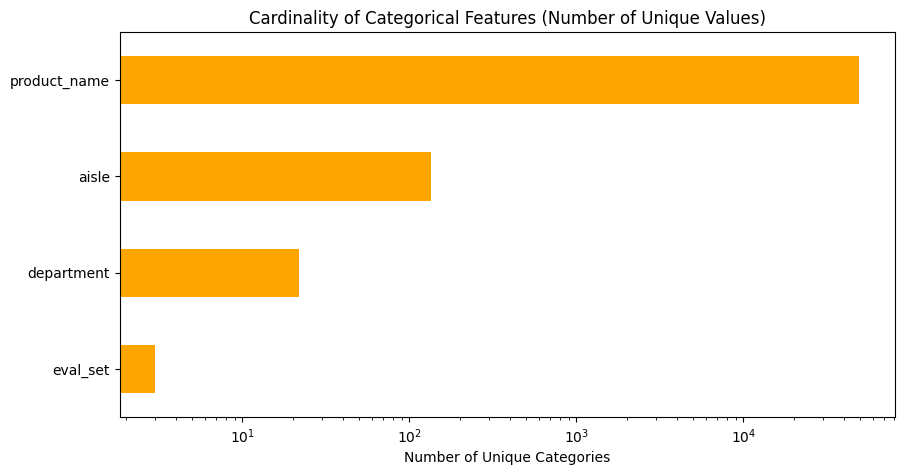

In [ ]:
categorical_cols = ['aisle', 'department', 'product_name', 'eval_set']
cardinality = My_Data[categorical_cols].nunique().sort_values()

plt.figure(figsize=(10, 5))
cardinality.plot(kind='barh', color='orange')
plt.title('Cardinality of Categorical Features (Number of Unique Values)')
plt.xlabel('Number of Unique Categories')
plt.xscale('log')
plt.show()

# **Correlation matrix, heatmap and pairwise scatter plots for selected numeric features.**

-  **Correlation Matrix / Heatmap**

    This graph tells us how strong the relationship is between any two variables with a number between (-1 and 1).

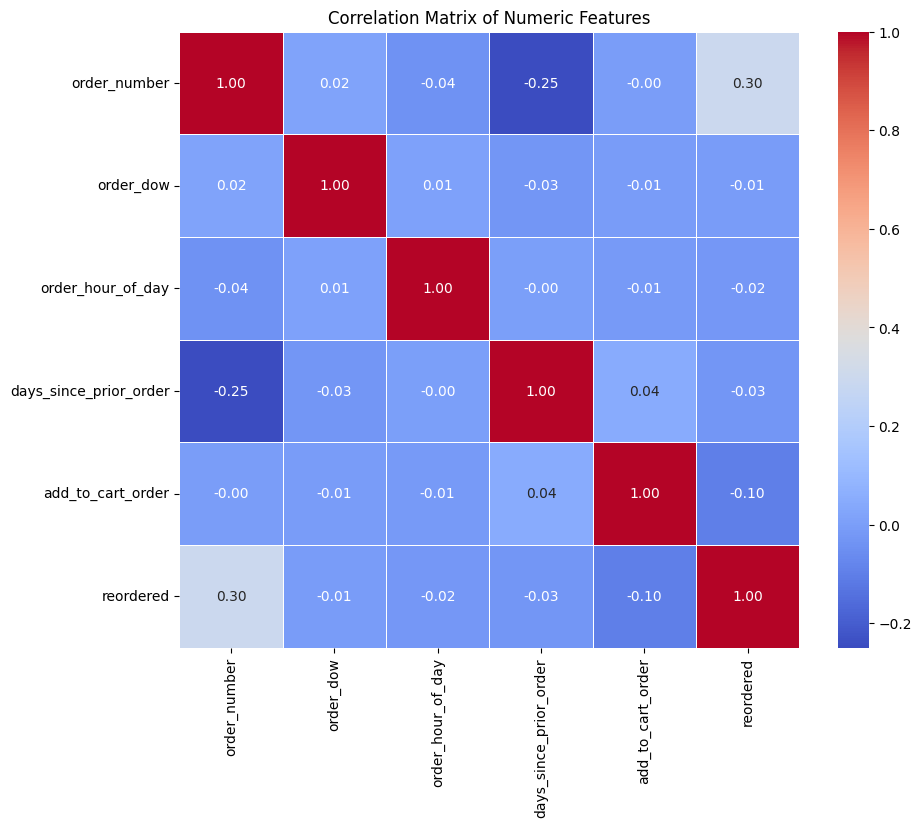

In [ ]:
numeric_cols = ['order_number', 'order_dow', 'order_hour_of_day',
                'days_since_prior_order', 'add_to_cart_order', 'reordered']

corr_matrix = My_Data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

-  **Pairwise Scatter Plots**

    A sample of 50,000 records was used because plotting a pairwise array requires extremely intensive computations that memory cannot handle with such a large dataset. Furthermore, plotting millions of points leads to overplotting, which obscures the details of class distribution, whereas a random sample provides an ideal balance between statistical accuracy and visual clarity.

    **What do the three colors mean?**
    
    - Dark color (1): Represents **reordered** products
    - Medium color (0): Represents **new products** purchased for the first time
    - Very light color (-1): Represents the **first orders for new users** (First Orders)

-  I developed the dual-color graph to include three color categories instead of two. This allowed us to clearly distinguish the initial requests (represented by the value -1). Through this graph, we demonstrated that the data from new users is completely isolated and does not cause any interference with the reorder patterns of existing users, thus improving the quality of the data input to the machine learning model.

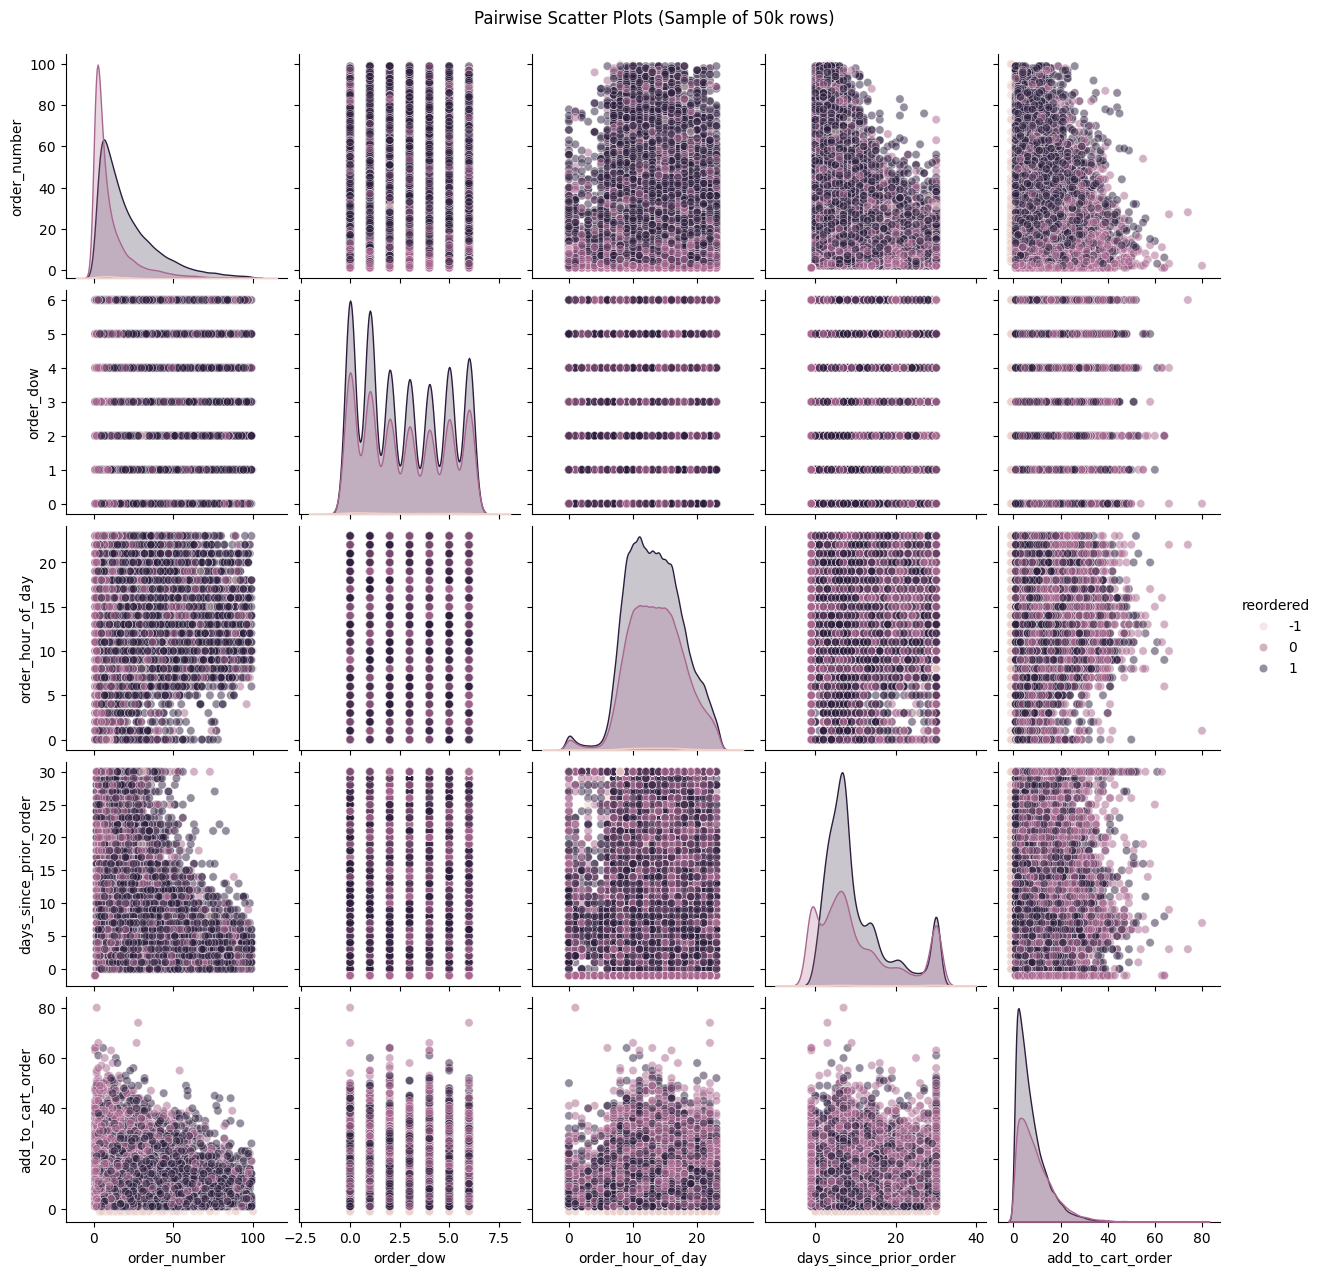

In [ ]:
data_sample = My_Data[numeric_cols].sample(50000)
sns.pairplot(data_sample, hue='reordered', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Scatter Plots (Sample of 50k rows)', y=1.02)
plt.show()

# **• Time-of-day, day-of-week, and monthly seasonality plots.**

- ##  We analyzed the seasonality of the time period to uncover purchasing cycles. The results showed a significant concentration of orders at the beginning of the week and during daylight hours (10:00 to 16:00). These time patterns provide important context for the model, as peak times are typically associated with 'stocking up' orders, which are characterized by high reorder rates.

- ##  We did not plot monthly seasonality because the Instacart dataset does not provide absolute calendar dates (timestamps), but rather relative time data focusing on the day of the week and hour of the day. Instead, we relied on days_since_prior_order analysis to uncover monthly patterns in repurchase behavior, with the results showing a clear peak at 30 days, representing the customers' monthly shopping cycle.

- **Daily Seasonality**

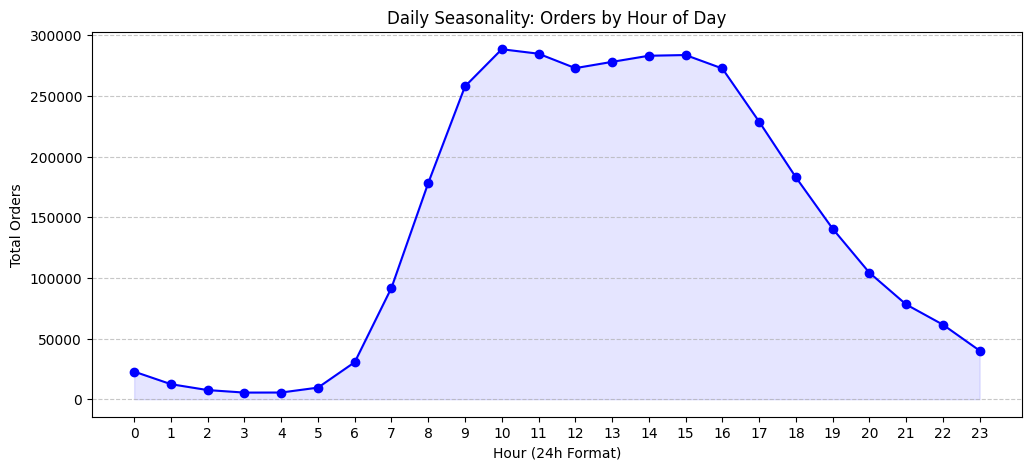

In [ ]:
hourly_season = My_Data.groupby('order_hour_of_day')['order_id'].nunique()

plt.figure(figsize=(12, 5))
plt.plot(hourly_season.index, hourly_season.values, marker='o', linestyle='-', color='b')
plt.fill_between(hourly_season.index, hourly_season.values, alpha=0.1, color='b')
plt.title('Daily Seasonality: Orders by Hour of Day')
plt.xlabel('Hour (24h Format)')
plt.ylabel('Total Orders')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.show()

- **Weekly Seasonality**

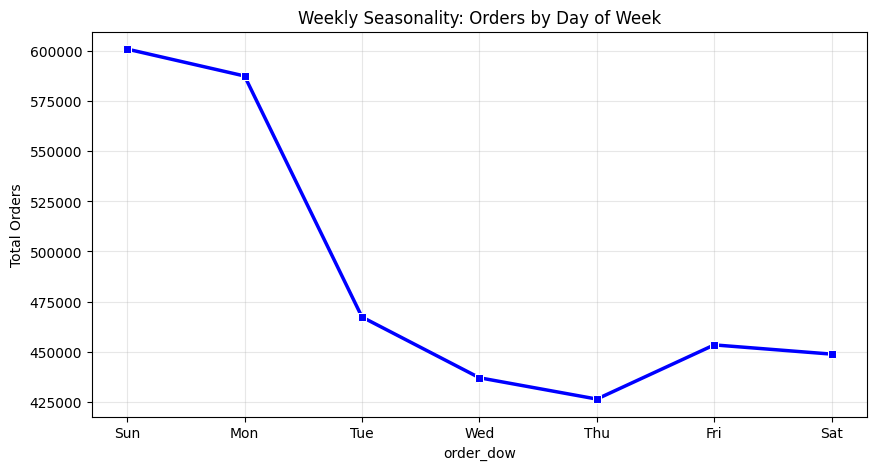

In [ ]:
weekly_season = My_Data.groupby('order_dow')['order_id'].nunique()

plt.figure(figsize=(10, 5))
sns.lineplot(x=weekly_season.index, y=weekly_season.values, marker='s', color='b', linewidth=2.5)
plt.title('Weekly Seasonality: Orders by Day of Week')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.ylabel('Total Orders')
plt.grid(True, alpha=0.3)
plt.show()